In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pathlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install glob2

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9311 sha256=dc6500b2afa3efa9cb29e0de34cd4304845950b41996cf7c6c0bc8e0536e07a5
  Stored in directory: c:\users\kiit\appdata\local\pip\cache\wheels\96\41\06\9f8fddc6eb1d75bde63db7f491311a4ae26905212617e06eb2
Successfully built glob2
Note: you may need to restart the kernel to use updated packages.


IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization 
# from tensorflow.keras.layers import experimental
from tensorflow.keras.utils import to_categorical
# from keras.utils import to_categorical

from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

In [2]:
pwd

'C:\\Users\\KIIT\\Downloads\\riceleaf'

In [3]:
#data path
trainpath = 'C:\\Users\\KIIT\\Downloads\\riceleaf\\train'
testpath = 'C:\\Users\\KIIT\\Downloads\\riceleaf\\test'


READING THE TRAIN IMAGE

In [4]:
new_size = 224
train_images = []
train_labels = []



for i in os.listdir(trainpath):
    print("Entering the folder:", i)
    files = gb.glob(os.path.join(trainpath, i, '*.jpg'))  # Pointing to all the .jpg extension image files
    print("Number of images in the folder:", len(files))
    for j in files:
        class_rice = {'Bacterialblight': 0, 'Blast': 1, 'Brownspot': 2, 'Tungro': 3}
        image_raw = cv2.imread(j)
        image = cv2.cvtColor(image_raw, cv2.COLOR_BGR2RGB)
        resize_image = cv2.resize(image, (new_size, new_size))
        train_images.append(resize_image)  # Append resized image directly
        train_labels.append(class_rice[i])


Entering the folder: Bacterialblight
Number of images in the folder: 1109
Entering the folder: Blast
Number of images in the folder: 1008
Entering the folder: Brownspot
Number of images in the folder: 1120
Entering the folder: Tungro
Number of images in the folder: 916


VISUALIZING TRAIN IMAGES

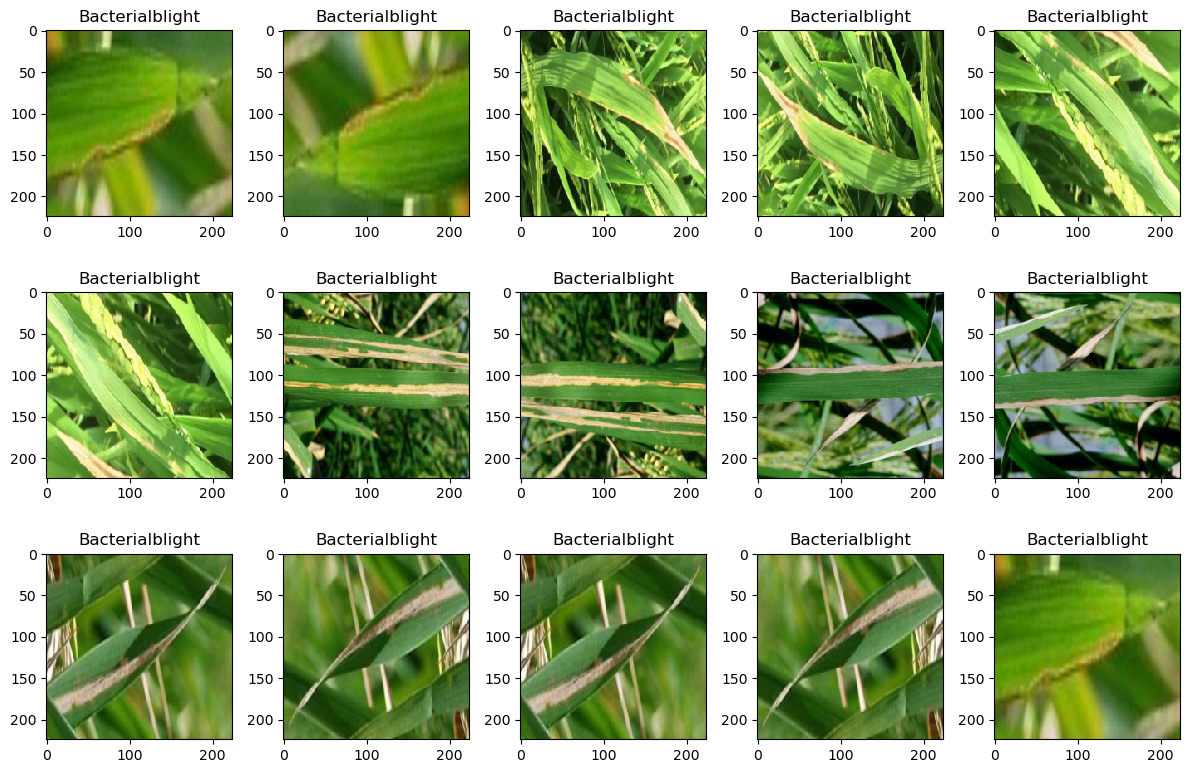

In [5]:
w = 40
h = 30
fig = plt.figure(figsize=(12, 8))
columns = 5
rows = 3

# Ensure we don't exceed the number of available images/labels
num_images = min(columns * rows, len(train_labels), len(train_images))

for i in range(1, num_images + 1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i - 1] == 0:
        ax.title.set_text('Bacterialblight')
    elif train_labels[i - 1] == 1:
        ax.title.set_text('Blast')
    elif train_labels[i - 1] == 2:
        ax.title.set_text('Brownspot')
    else:
        ax.title.set_text('Tungro')
    plt.imshow(train_images[i - 1], interpolation='nearest')

plt.tight_layout()
plt.show()

In [7]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):# entering to the test folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:
      class_rice={'Bacterialblight':0,'Blast':1,'Brownspot':2, 'Tungro':3}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_rice[i])

Entering to the folder name: Bacterialblight
Number of images in the folder is 475
Entering to the folder name: Blast
Number of images in the folder is 432
Entering to the folder name: Brownspot
Number of images in the folder is 480
Entering to the folder name: Tungro
Number of images in the folder is 392


VISUALIZING TEST IMAGES

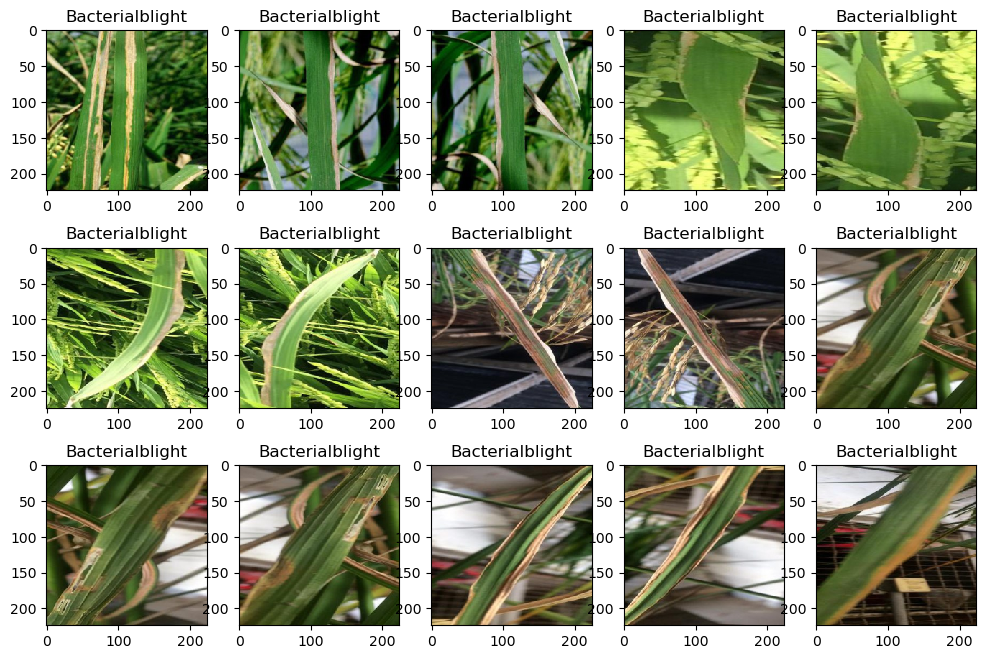

In [8]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('Bacterialblight')
    elif train_labels[i - 1] == 1:
        ax.title.set_text('Blast')
    elif train_labels[i - 1] == 2:
        ax.title.set_text('Brownspot')
    else:
        ax.title.set_text('Tungro')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [9]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)

In [10]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(4153, 224, 224, 3)
********************
(4153,)
********************
(1779, 224, 224, 3)
(1779,)


In [11]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)
y_test1=y_test
y_train1=y_train
y_train,y_test=keras_to_categorical(y_train,y_test)

In [12]:
y_train.shape,y_test.shape

((4153, 4), (1779, 4))

#RAW VGG16

In [13]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=4,kernel_initializer="glorot_uniform", activation='softmax')(d1)
  output = Model(inputs =VGG_model.input, outputs =d2)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model16 = model_vgg16()

In [14]:
model16.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
# Example usage with accuracy as a metri

In [15]:
history = model16.fit(X_train, y_train, validation_split=0.3,
                    epochs= 4, batch_size=5 , verbose=1,validation_data=(X_test,y_test)
                   )

Epoch 1/4
831/831 ━━━━━━━━━━━━━━━━━━━━ 1234s 1s/step - accuracy: 0.5887 - loss: 0.1979 - val_accuracy: 0.7229 - val_loss: 0.1370
Epoch 2/4
831/831 ━━━━━━━━━━━━━━━━━━━━ 2280s 3s/step - accuracy: 0.7159 - loss: 0.1394 - val_accuracy: 0.8010 - val_loss: 0.0953
Epoch 3/4
831/831 ━━━━━━━━━━━━━━━━━━━━ 4910s 6s/step - accuracy: 0.8721 - loss: 0.0616 - val_accuracy: 0.9236 - val_loss: 0.0369
Epoch 4/4
831/831 ━━━━━━━━━━━━━━━━━━━━ 1186s 1s/step - accuracy: 0.8918 - loss: 0.0521 - val_accuracy: 0.9258 - val_loss: 0.0358


#RAW VGG19

In [17]:
def model_vgg19():
  VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG19_model.layers:
    layer.trainable = False #True for actual transfer learning
      
  feature=keras.layers.GlobalAveragePooling2D()(VGG19_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=4,kernel_initializer="glorot_uniform", activation='softmax')(d1)
  output = Model(inputs =VGG19_model.input, outputs =d2)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model19=model_vgg19()

In [18]:
model19.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])

In [19]:
history = model19.fit(X_train, y_train, validation_split=0.3,
                    epochs= 5, batch_size= 5, verbose=1,validation_data=(X_test,y_test)
                   )

Epoch 1/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 1651s 2s/step - accuracy: 0.7050 - loss: 0.1340 - val_accuracy: 0.8623 - val_loss: 0.0637
Epoch 2/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 4535s 5s/step - accuracy: 0.8803 - loss: 0.0559 - val_accuracy: 0.8477 - val_loss: 0.0725
Epoch 3/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 12428s 15s/step - accuracy: 0.9186 - loss: 0.0373 - val_accuracy: 0.9449 - val_loss: 0.0261
Epoch 4/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 1775s 2s/step - accuracy: 0.9404 - loss: 0.0274 - val_accuracy: 0.9562 - val_loss: 0.0201
Epoch 5/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 1677s 2s/step - accuracy: 0.9596 - loss: 0.0193 - val_accuracy: 0.9573 - val_loss: 0.0205


FEATURE EXTRACTION OF VGG-16

In [24]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_16=model_vgg16()

In [22]:
model_FE_16.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

130/130 ━━━━━━━━━━━━━━━━━━━━ 892s 7s/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 337s 6s/step


In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_16,y_train)
train_pred=rf.predict(train_feature_16)
test_pred=rf.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.9567172568858909


In [28]:
import setuptools.dist
import zipfile
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras.applications import MobileNet


from tensorflow.keras.applications import ResNet50

from tensorflow.keras.optimizers import Adam



In [29]:
# Train RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_feature_16, y_train1)

# Predictions
train_pred = rf.predict(train_feature_16)
test_pred = rf.predict(test_feature_16)

# Calculate metrics
conf_matrix = confusion_matrix(y_test1, test_pred)

# Calculate metrics
accuracy = accuracy_score(y_test1, test_pred)
precision = precision_score(y_test1, test_pred, average='weighted')
recall = recall_score(y_test1, test_pred, average='weighted')
f1 = f1_score(y_test1, test_pred, average='weighted')

# Specificity calculation (for multiclass, compute average of per-class specificity)
# Note: Specificity for multiclass is not straightforward like binary classification
# Here, we calculate an average of per-class specificity
num_classes = conf_matrix.shape[0]
specificity = 0
for i in range(num_classes):
    TP = conf_matrix[i, i]
    FP = np.sum(conf_matrix[:, i]) - TP
    TN = np.sum(conf_matrix) - np.sum(conf_matrix[i, :]) - np.sum(conf_matrix[:, i]) + TP
    FN = np.sum(conf_matrix[i, :]) - TP
    if FP + TN > 0:
        specificity += TN / (FP + TN)
    else:
        specificity += 0  # Handle division by zero case
    
specificity /= num_classes

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("Specificity:", specificity)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9921304103428893
Precision: 0.9921620521733204
Recall (Sensitivity): 0.9921304103428893
F1 Score: 0.9921230132503351
Specificity: 0.9973230256479776
Confusion Matrix:
[[473   2   0   0]
 [  2 423   7   0]
 [  3   0 477   0]
 [  0   0   0 392]]


FEATURE EXTRACTION OF VGG-19

In [30]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_19=model_vgg19()

In [31]:
model_FE_19.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

130/130 ━━━━━━━━━━━━━━━━━━━━ 1141s 9s/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 462s 8s/step


In [32]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_19,y_train)
train_pred=rf.predict(train_feature_19)
test_pred=rf.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.9421023046655425


FUSION OF FEATURES VGG16 & VGG19

In [33]:
final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(final_train,y_train)
train_pred=rf.predict(final_train)
test_pred=rf.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.9612141652613828


MOBILENETV2


In [89]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [90]:
train_dir = 'C:\\Users\\KIIT\\Downloads\\riceleaf\\train'
test_dir = 'C:\\Users\\KIIT\\Downloads\\riceleaf\\test'

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 5

# Use ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 4153 images belonging to 4 classes.
Found 1779 images belonging to 4 classes.


In [91]:
# Load MobileNetV2 model pretrained on ImageNet without top layer
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add custom top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Combine base model and top layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base layers during initial training
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)   │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer_20[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,915,908 (11.12 MB)

 Trainable params: 657,924 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [92]:
# Define callbacks (optional: EarlyStopping, ReduceLROnPlateau)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
epochs = 5
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 254s 290ms/step - accuracy: 0.8304 - loss: 0.5187 - val_accuracy: 0.9646 - val_loss: 0.1015 - learning_rate: 0.0010
Epoch 2/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 241s 289ms/step - accuracy: 0.9705 - loss: 0.0847 - val_accuracy: 0.9871 - val_loss: 0.0398 - learning_rate: 0.0010
Epoch 3/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 202s 243ms/step - accuracy: 0.9744 - loss: 0.0767 - val_accuracy: 0.9904 - val_loss: 0.0388 - learning_rate: 0.0010
Epoch 4/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 1336s 2s/step - accuracy: 0.9911 - loss: 0.0256 - val_accuracy: 0.9663 - val_loss: 0.0724 - learning_rate: 0.0010
Epoch 5/5
831/831 ━━━━━━━━━━━━━━━━━━━━ 329s 391ms/step - accuracy: 0.9891 - loss: 0.0295 - val_accuracy: 0.9949 - val_loss: 0.0142 - learning_rate: 0.0010


In [93]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print(f'Test accuracy: {test_acc:.4f}') 

356/356 - 44s - 123ms/step - accuracy: 0.9949 - loss: 0.0142
Test accuracy: 0.9949
